In [94]:
import sqlite3 as sql
import pandas as pd

In [95]:
# dir(sql)

In [96]:
#connection
conn = sql.connect('database.sqlite')
conn

In [97]:
a = conn.execute('select * from Salaries')
a

In [98]:
# a.fetchall()

### table info

In [99]:
pd.read_sql_query('select * from sqlite_master',conn)

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...
1,index,salaries_year_idx,Salaries,16566,CREATE INDEX salaries_year_idx ON Salaries (Year)


In [100]:
pd.read_sql_query('select * from Salaries',conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [101]:
'select * from sqlite_master'

'select * from sqlite_master'

### null values

In [102]:
pd.read_sql_query('select * from Salaries where EmployeeName is null', conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [103]:
pd.read_sql_query('select EmployeeName, Jobtitle from Salaries where Jobtitle is null', conn)

,EmployeeName,JobTitle


In [104]:
pd.read_sql_query('select EmployeeName, Jobtitle from Salaries where Jobtitle = "Not provided"', conn)

,EmployeeName,JobTitle
0,Not provided,Not provided
1,Not provided,Not provided
2,Not provided,Not provided
3,Not provided,Not provided


In [105]:
pd.read_sql_query('select EmployeeName, Jobtitle,BASEPAY from Salaries WHERE BASEPAY NULL', conn)

DatabaseError: Execution failed on sql 'select EmployeeName, Jobtitle,BASEPAY from Salaries WHERE BASEPAY NULL': near "NULL": syntax error

In [106]:
pd.read_sql_query('select EmployeeName, Jobtitle,BASEPAY from Salaries WHERE BASEPAY null', conn)

DatabaseError: Execution failed on sql 'select EmployeeName, Jobtitle,BASEPAY from Salaries WHERE BASEPAY null': near "null": syntax error

In [107]:
pd.read_sql_query('select EmployeeName, Jobtitle,BASEPAY from Salaries WHERE BASEPAY is not null', conn)

,EmployeeName,JobTitle,BasePay
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6
...,...,...,...
148649,Roy I Tillery,Custodian,0
148650,Not provided,Not provided,Not Provided
148651,Not provided,Not provided,Not Provided
148652,Not provided,Not provided,Not Provided


In [108]:
def sql_query(q):
    return pd.read_sql_query(q,conn)

In [109]:
q = '''select * 
    from Salaries'''

sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


### distinct

In [110]:
q = '''select distinct jobtitle from Salaries'''

sql_query(q)

,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,CAPTAIN III (POLICE DEPARTMENT)
2,WIRE ROPE CABLE MAINTENANCE MECHANIC
3,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
4,ASSISTANT DEPUTY CHIEF II
...,...
2154,"Sr Cnselor, Juv Hall (SFERS)"
2155,Forensic Toxicologist Supervis
2156,Conversion
2157,Cashier 3


In [111]:
q = '''select distinct jobtitle from Salaries
    where JobTitle != "Not provided" '''

sql_query(q)

,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,CAPTAIN III (POLICE DEPARTMENT)
2,WIRE ROPE CABLE MAINTENANCE MECHANIC
3,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
4,ASSISTANT DEPUTY CHIEF II
...,...
2153,Marina Associate Manager
2154,"Sr Cnselor, Juv Hall (SFERS)"
2155,Forensic Toxicologist Supervis
2156,Conversion


In [112]:
q = '''select distinct Year from Salaries'''

sql_query(q)

,Year
0,2011
1,2012
2,2013
3,2014


In [113]:
q = '''select from Salaries distinct Year'''

sql_query(q)

DatabaseError: Execution failed on sql 'select from Salaries distinct Year': near "from": syntax error

### Alias

In [114]:
q = '''select employeename Employee from Salaries'''

sql_query(q)

,Employee
0,NATHANIEL FORD
1,GARY JIMENEZ
2,ALBERT PARDINI
3,CHRISTOPHER CHONG
4,PATRICK GARDNER
...,...
148649,Roy I Tillery
148650,Not provided
148651,Not provided
148652,Not provided


In [115]:
q = '''select employeename Employee Name from Salaries'''

sql_query(q)

DatabaseError: Execution failed on sql 'select employeename Employee Name from Salaries': near "Name": syntax error

In [34]:
q = '''select employeename "Employee Name" from Salaries'''

sql_query(q)

,Employee Name
0,NATHANIEL FORD
1,GARY JIMENEZ
2,ALBERT PARDINI
3,CHRISTOPHER CHONG
4,PATRICK GARDNER
...,...
148649,Roy I Tillery
148650,Not provided
148651,Not provided
148652,Not provided


In [35]:
q = '''select employeename "Employee Name", Jobtitle Title from Salaries'''

sql_query(q)

,Employee Name,Title
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT)
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT)
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
...,...,...
148649,Roy I Tillery,Custodian
148650,Not provided,Not provided
148651,Not provided,Not provided
148652,Not provided,Not provided


In [36]:
q = '''select employeename as "Employee Name" from Salaries'''

sql_query(q)

,Employee Name
0,NATHANIEL FORD
1,GARY JIMENEZ
2,ALBERT PARDINI
3,CHRISTOPHER CHONG
4,PATRICK GARDNER
...,...
148649,Roy I Tillery
148650,Not provided
148651,Not provided
148652,Not provided


In [37]:
q = '''select employeename as (Employee Name) from Salaries'''

sql_query(q)

DatabaseError: Execution failed on sql 'select employeename as (Employee Name) from Salaries': near "(": syntax error

In [38]:
q = '''select employeename as "(Employee Name)" from Salaries'''

sql_query(q)

,(Employee Name)
0,NATHANIEL FORD
1,GARY JIMENEZ
2,ALBERT PARDINI
3,CHRISTOPHER CHONG
4,PATRICK GARDNER
...,...
148649,Roy I Tillery
148650,Not provided
148651,Not provided
148652,Not provided


### Ascending/Descending order by

In [39]:
q = '''select basepay, OTHERPAY from Salaries order by basepay'''

sql_query(q)

,BasePay,OtherPay
0,-166.01,0
1,-121.63,0
2,-109.22,0
3,-106.6,0
4,-101.88,0
...,...,...
148649,,0
148650,Not Provided,Not Provided
148651,Not Provided,Not Provided
148652,Not Provided,Not Provided


In [40]:
q = '''select basepay, OTHERPAY order by basepay from Salaries'''

sql_query(q)

DatabaseError: Execution failed on sql 'select basepay, OTHERPAY order by basepay from Salaries': near "from": syntax error

In [41]:
q = '''select basepay, OTHERPAY, overtimepay, totalpay from Salaries order by 2'''

sql_query(q)

,BasePay,OtherPay,OvertimePay,TotalPay
0,101274.51,-7058.59,0,94215.92
1,0,-618.13,0,-618.13
2,6932.5,-50.19,0,6882.31
3,59733.32,-46.76,46.76,59733.32
4,66744,-9.6,2234.4,68968.80
...,...,...,...,...
148649,167411.18,400184.25,0,567595.43
148650,Not Provided,Not Provided,Not Provided,0.00
148651,Not Provided,Not Provided,Not Provided,0.00
148652,Not Provided,Not Provided,Not Provided,0.00


In [ ]:
q = '''select basepay, OTHERPAY, overtimepay, totalpay from Salaries order by 4 desc'''

sql_query(q)

In [42]:
q = '''select basepay, OTHERPAY, overtimepay, totalpay from Salaries desc order by 4'''

sql_query(q)

,BasePay,OtherPay,OvertimePay,TotalPay
0,0,-618.13,0,-618.13
1,0,0,0,0.00
2,0,0,0,0.00
3,0,0,0,0.00
4,0,0,0,0.00
...,...,...,...,...
148649,128808.87,13126.31,220909.48,362844.66
148650,318835.49,60563.54,10712.95,390111.98
148651,129150.01,342802.63,0,471952.64
148652,155966.02,137811.38,245131.88,538909.28


### limit

In [43]:
q = '''select basepay, OTHERPAY, overtimepay, totalpay from Salaries order by 4 desc limit 10'''

sql_query(q)

,BasePay,OtherPay,OvertimePay,TotalPay
0,167411.18,400184.25,0.00,567595.43
1,155966.02,137811.38,245131.88,538909.28
2,129150.01,342802.63,0.00,471952.64
3,318835.49,60563.54,10712.95,390111.98
4,128808.87,13126.31,220909.48,362844.66
5,104404.00,245999.41,0.00,350403.41
6,186236.42,29648.27,131217.63,347102.32
7,270222.04,67956.20,6009.22,344187.46
8,257340.00,82313.70,0.00,339653.70
9,319275.01,20007.06,0.00,339282.07


In [44]:
q = '''select basepay, OTHERPAY, overtimepay, totalpay from Salaries limit 10 order by 4 desc'''

sql_query(q)

DatabaseError: Execution failed on sql 'select basepay, OTHERPAY, overtimepay, totalpay from Salaries limit 10 order by 4 desc': near "order": syntax error

In [117]:
q = '''select jobtitle, totalpay from Salaries order by 2 desc limit 10'''

sql_query(q)

,JobTitle,TotalPay
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
1,CAPTAIN III (POLICE DEPARTMENT),538909.28
2,Deputy Chief 3,471952.64
3,Asst Med Examiner,390111.98
4,"Lieutenant, Fire Suppression",362844.66
5,Captain 3,350403.41
6,"Battalion Chief, Fire Suppress",347102.32
7,Asst Med Examiner,344187.46
8,Chief Investment Officer,339653.70
9,Chief of Police,339282.07


<Axes: xlabel='JobTitle'>

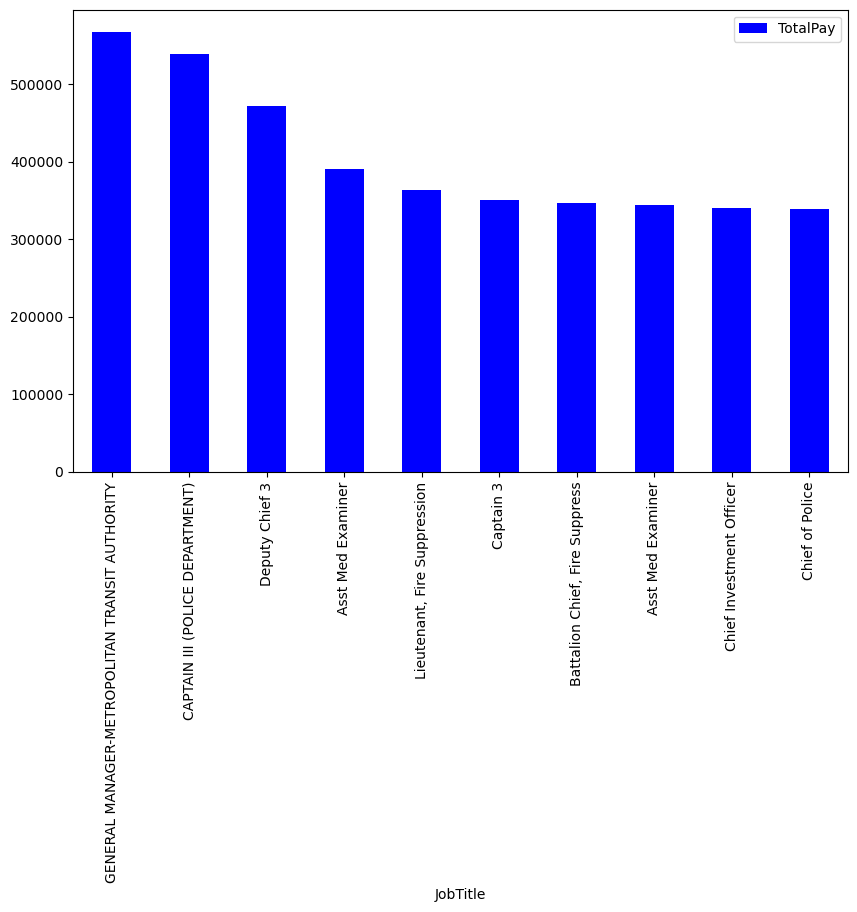

In [119]:
a = pd.read_sql_query(q,conn)
a.plot(kind='bar', x='JobTitle', y='TotalPay', color='blue', figsize=(10,6))

### operators

In [59]:
# Show jobtitle where overtimepay > 50k and excluded 'not provided' rows

q= '''select JobTitle, overtimepay from Salaries 
where overtimepay > 50000 and JobTitle != "Not provided" '''

sql_query(q)

,JobTitle,OvertimePay
0,CAPTAIN III (POLICE DEPARTMENT),245131.88
1,CAPTAIN III (POLICE DEPARTMENT),106088.18
2,WIRE ROPE CABLE MAINTENANCE MECHANIC,56120.71
3,"BATTALION CHIEF, (FIRE DEPARTMENT)",89062.90
4,"BATTALION CHIEF, (FIRE DEPARTMENT)",86362.68
...,...,...
2160,Transit Operator,51625.42
2161,Transit Operator,52550.53
2162,Track Maintenance Worker,50265.23
2163,Diagnostic Imaging Tech I,74935.96


In [60]:
# Show All Employess With A Total Pay Between 50,000 and 75,000
q = '''select employeename, totalpay from Salaries
where totalpay between 50000 and 75000'''

sql_query(q)

,EmployeeName,TotalPay
0,MAMIKO NAKAMURA,74999.62
1,HEDLEY PRINCE,74998.73
2,LINDA BARNARD,74998.30
3,ANGELA WHITTAKER,74997.84
4,JANE CHU,74997.81
...,...,...
33552,Stephanie Reidy,51785.23
33553,Maria Theresa Luna,52266.82
33554,Paul E Maltzer,51673.98
33555,Kevin I Dolar,50953.19


In [61]:
# Show All Employees With A BasePay less than 50,000 Or A TotalPay Greater Than 100,000
q= '''select EmployeeName, BasePay, TotalPay from Salaries
where BasePay < 50000 or TotalPay > 100000'''
sql_query(q)

,EmployeeName,BasePay,TotalPay
0,NATHANIEL FORD,167411.18,567595.43
1,GARY JIMENEZ,155966.02,538909.28
2,ALBERT PARDINI,212739.13,335279.91
3,CHRISTOPHER CHONG,77916,332343.61
4,PATRICK GARDNER,134401.6,326373.19
...,...,...,...
91290,Carolyn A Wilson,0,0.00
91291,Joann Anderson,0,0.00
91292,Leon Walker,0,0.00
91293,Roy I Tillery,0,0.00


### in

In [68]:
q = '''select employeename, jobtitle from Salaries 
where jobtitle = "WIRE ROPE CABLE MAINTENANCE MECHANIC"
or
jobtitle = "CAPTAIN III (POLICE DEPARTMENT)"
'''

sql_query(q)

,EmployeeName,JobTitle
0,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT)
1,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT)
2,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC
3,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT)
4,ANNA BROWN,CAPTAIN III (POLICE DEPARTMENT)
5,RICHARD PARRY,CAPTAIN III (POLICE DEPARTMENT)
6,DONNA MEIXNER,CAPTAIN III (POLICE DEPARTMENT)
7,JOHN MURPHY,CAPTAIN III (POLICE DEPARTMENT)
8,SHARON FERRIGNO,CAPTAIN III (POLICE DEPARTMENT)
9,CROCE CASCIATO,CAPTAIN III (POLICE DEPARTMENT)


In [69]:
q = '''select employeename, jobtitle from Salaries 
where jobtitle in ('WIRE ROPE CABLE MAINTENANCE MECHANIC', 'CAPTAIN III (POLICE DEPARTMENT)',
'Chief of Police')
'''

sql_query(q)

,EmployeeName,JobTitle
0,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT)
1,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT)
2,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC
3,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT)
4,ANNA BROWN,CAPTAIN III (POLICE DEPARTMENT)
5,RICHARD PARRY,CAPTAIN III (POLICE DEPARTMENT)
6,DONNA MEIXNER,CAPTAIN III (POLICE DEPARTMENT)
7,JOHN MURPHY,CAPTAIN III (POLICE DEPARTMENT)
8,SHARON FERRIGNO,CAPTAIN III (POLICE DEPARTMENT)
9,CROCE CASCIATO,CAPTAIN III (POLICE DEPARTMENT)


In [70]:
q = '''select employeename, jobtitle from Salaries 
where jobtitle not in ('WIRE ROPE CABLE MAINTENANCE MECHANIC', 'CAPTAIN III (POLICE DEPARTMENT)',
'Chief of Police')
'''

sql_query(q)

,EmployeeName,JobTitle
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
2,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II
3,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)"
4,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS
...,...,...
148601,Roy I Tillery,Custodian
148602,Not provided,Not provided
148603,Not provided,Not provided
148604,Not provided,Not provided


### like

In [75]:
q = '''select jobtitle from Salaries where jobtitle like "CAPTAIN"
'''

sql_query(q)

,JobTitle


In [73]:
q = '''select jobtitle from Salaries where jobtitle like '%captain%'
'''

sql_query(q)

,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,CAPTAIN III (POLICE DEPARTMENT)
2,CAPTAIN III (POLICE DEPARTMENT)
3,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES"
4,"CAPTAIN, FIRE SUPPRESSION"
...,...
547,"Captain, Fire Suppression"
548,Captain 3
549,"Captain, Fire Suppression"
550,Captain 3


In [76]:
q = '''select jobtitle from Salaries where jobtitle like 'captain%'
'''

sql_query(q)

,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,CAPTAIN III (POLICE DEPARTMENT)
2,CAPTAIN III (POLICE DEPARTMENT)
3,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES"
4,"CAPTAIN, FIRE SUPPRESSION"
...,...
516,"Captain, Fire Suppression"
517,Captain 3
518,"Captain, Fire Suppression"
519,Captain 3


In [77]:
q = '''select jobtitle from Salaries where jobtitle like '%captain'
'''

sql_query(q)

,JobTitle
0,SHERIFF'S CAPTAIN
1,SHERIFF'S CAPTAIN
2,SHERIFF'S CAPTAIN
3,SHERIFF'S CAPTAIN
4,SHERIFF'S CAPTAIN
5,SHERIFF'S CAPTAIN
6,SHERIFF'S CAPTAIN
7,SHERIFF'S CAPTAIN
8,Sheriff's Captain
9,Sheriff's Captain


In [78]:
q = '''select jobtitle from Salaries where jobtitle like 'Captain 3'
'''

sql_query(q)

,JobTitle
0,Captain 3
1,Captain 3
2,Captain 3
3,Captain 3
4,Captain 3
...,...
96,Captain 3
97,Captain 3
98,Captain 3
99,Captain 3


In [79]:
q = '''select jobtitle from Salaries where jobtitle like '%f__r%'
'''

sql_query(q)

,JobTitle
0,"CHIEF PROBATION OFFICER, JUVENILE COURT"
1,ASST. CHIEF PROBATION OFFICER-JUVENILE PROBATION
2,GOVERNMENT AND PUBLIC AFFAIRS MANAGER
3,GOVERNMENT AND PUBLIC AFFAIRS MANAGER
4,GOVERNMENT AND PUBLIC AFFAIRS MANAGER
5,GOVERNMENT AND PUBLIC AFFAIRS MANAGER
6,ASSOCIATE AFFIRMATIVE ACTION COORDINATOR
7,ASSOCIATE AFFIRMATIVE ACTION COORDINATOR
8,ASSOCIATE AFFIRMATIVE ACTION COORDINATOR
9,ASSOCIATE AFFIRMATIVE ACTION COORDINATOR


In [80]:
q = '''select jobtitle from Salaries where jobtitle like '%f__e%'
'''

sql_query(q)

,JobTitle
0,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
1,"BATTALION CHIEF, (FIRE DEPARTMENT)"
2,"BATTALION CHIEF, (FIRE DEPARTMENT)"
3,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"
4,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"
...,...
16800,Bldg & Grounds Patrol Officer
16801,Fire Alarm Dispatcher
16802,Transit Fare Inspector
16803,Parking Control Officer


In [81]:
q = '''select jobtitle from Salaries where jobtitle like 'f__e%'
'''

sql_query(q)

,JobTitle
0,FIREFIGHTER
1,FIRE FIGHTER PARAMEDIC
2,FIRE FIGHTER PARAMEDIC
3,FIREFIGHTER
4,FIREFIGHTER
...,...
3764,Firefighter
3765,Firefighter
3766,Firefighter
3767,Firefighter


### Aggregate functions

In [82]:
#count
q = '''select count Jobtitle from Salaries where jobtitle = 'Fire Alarm Dispatcher'
'''

sql_query(q)

DatabaseError: Execution failed on sql 'select count Jobtitle from Salaries where jobtitle = 'Fire Alarm Dispatcher'
': no such column: count

In [83]:
#count
q = '''select count(Jobtitle) from Salaries where jobtitle = 'Fire Alarm Dispatcher'
'''

sql_query(q)

,count(Jobtitle)
0,20


In [84]:
#count
q = '''select count(Jobtitle) as 'Count of Fire Alarm Dispatcher'
from Salaries where jobtitle = 'Fire Alarm Dispatcher'
'''

sql_query(q)

,Count of Fire Alarm Dispatcher
0,20


In [85]:
#average
q = '''select avg(totalpay) as 'Average of Total Pay Firefighter' from Salaries
    where jobtitle = 'Firefighter'
'''

sql_query(q)

,Average of Total Pay Firefighter
0,145881.787516


In [88]:
#average
q = '''select TOTALPAY from Salaries
    where jobtitle = 'Firefighter'
'''

sql_query(q)

,TotalPay
0,290076.13
1,267951.41
2,259740.36
3,245399.19
4,246369.02
...,...
2354,0.00
2355,0.00
2356,1196.14
2357,688.71


In [89]:
#max 

q = '''select max(totalpay) as 'Highest Pay', Jobtitle, employeename from Salaries
    '''

sql_query(q)

,Highest Pay,JobTitle,EmployeeName
0,567595.43,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,NATHANIEL FORD


In [92]:
#min 

q = '''select min(totalpay) as 'Highest Pay', Jobtitle, employeename from Salaries
    '''

sql_query(q)

,Highest Pay,JobTitle,EmployeeName
0,-618.13,"Counselor, Log Cabin Ranch",Joe Lopez


In [ ]:
# How many employees in the salaries table have OvertimePay equal to 0?
